# Exploratory Data Analysis📊

**Project:** Analysis of Used Cars in the UAE🇦🇪  
**Autor:** Felipe Perdomo    
**Date:** Abril 2025  


## The goal of this analysis is to explore, clean, and visualize data on used cars in the UAE🇦🇪 to identify trends

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset    #this dataset is from Kaggle
df = pd.read_csv("/Users/felipeperdomo/Downloads/carpeta_uae/uae_used_cars_10k.csv")

In [6]:
df.head()

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,Location,Description
0,toyota,camry,2016,47819,156500,Sedan,4,Automatic Transmission,Gasoline,Black,Dubai,"2016 toyota camry with Rear camera, Leather se..."
1,kia,sorento,2013,61250,169543,SUV,4,Automatic Transmission,Gasoline,Grey,Abu Dhabi,"2013 kia sorento with Sunroof, Adaptive cruise..."
2,mini,cooper,2023,31861,221583,Soft Top Convertible,4,Automatic Transmission,Gasoline,Grey,Dubai,"2023 mini cooper with Adaptive cruise control,..."
3,nissan,altima,2016,110322,69754,Sedan,4,Automatic Transmission,Gasoline,Red,Dubai,"2016 nissan altima with Rear camera, Adaptive ..."
4,toyota,land-cruiser-76-series,2020,139994,71399,Pick Up Truck,4,Manual Transmission,Gasoline,White,Dubai,2020 toyota land-cruiser-76-series with Adapti...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          10000 non-null  object
 1   Model         10000 non-null  object
 2   Year          10000 non-null  int64 
 3   Price         10000 non-null  int64 
 4   Mileage       10000 non-null  int64 
 5   Body Type     10000 non-null  object
 6   Cylinders     9895 non-null   object
 7   Transmission  10000 non-null  object
 8   Fuel Type     10000 non-null  object
 9   Color         10000 non-null  object
 10  Location      10000 non-null  object
 11  Description   10000 non-null  object
dtypes: int64(3), object(9)
memory usage: 937.6+ KB


In [9]:
df.describe()

,Year,Price,Mileage
count,10000.000000,1.000000e+04,10000.000000
mean,2014.472800,2.452345e+05,155161.871700
std,5.790839,4.709773e+05,83681.858983
min,2005.000000,7.183000e+03,10006.000000
25%,2009.000000,5.035250e+04,82904.000000
50%,2014.000000,1.027660e+05,154370.500000
75%,2019.000000,2.312480e+05,227551.250000
max,2024.000000,1.468698e+07,299996.000000


In [11]:
#check null values ​​per column
df.isnull().sum()

Make              0
Model             0
Year              0
Price             0
Mileage           0
Body Type         0
Cylinders       105
Transmission      0
Fuel Type         0
Color             0
Location          0
Description       0
dtype: int64

In [15]:
# Delete rows with null values ​​in 'Cylinders'
df = df.dropna(subset=['Cylinders'])

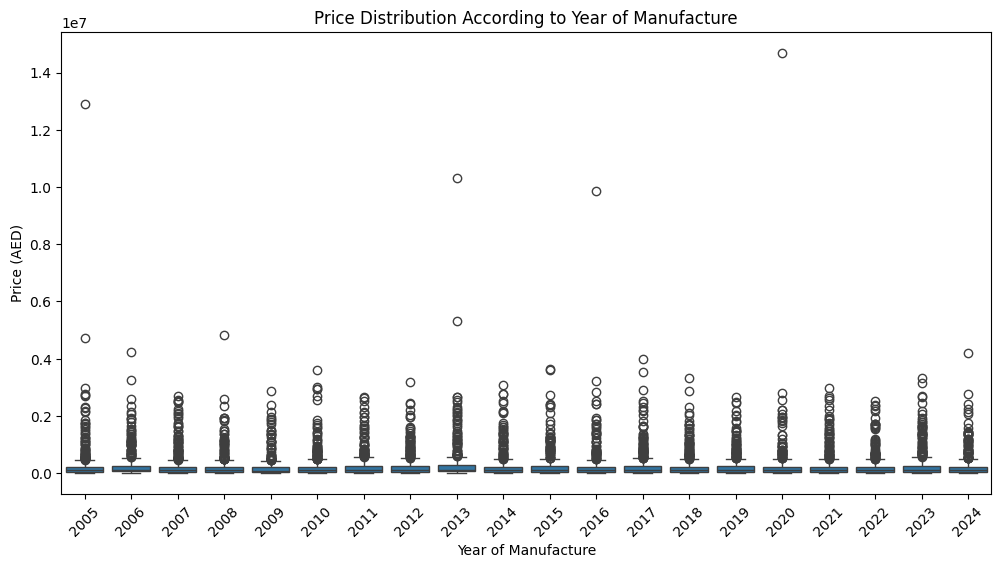

In [29]:
# Display of price distribution by Year of Manufacture
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Price', data=df)
plt.title('Price Distribution According to Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (AED)')
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.show()

# ⬆️Here⬆️ I found a lot of outliers in the data, so I decided to apply a formula using quartiles to eliminate the outliers.

In [18]:
# Calculate the interquartile range (IQR) to identify outliers
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Print the outlier limits
print(f"Lower limit: {lower_limit}")
print(f"Upper limit: {upper_limit}")

# Find the outliers in the dataset (prices outside the range)
outliers = df[(df['Price'] < lower_limit) | (df['Price'] > upper_limit)]
print(f"Number of outliers: {outliers.shape[0]}")

Lower limit: -219528.25
Upper limit: 498989.75
Number of outliers: 1100


In [21]:
# Remove outliers (rows with prices outside the defined range)
df_cleaned = df[(df['Price'] >= lower_limit) & (df['Price'] <= upper_limit)]

# Check the number of rows after removing outliers
print(f"Rows after removing outliers: {df_cleaned.shape[0]}")

Rows after removing outliers: 8795


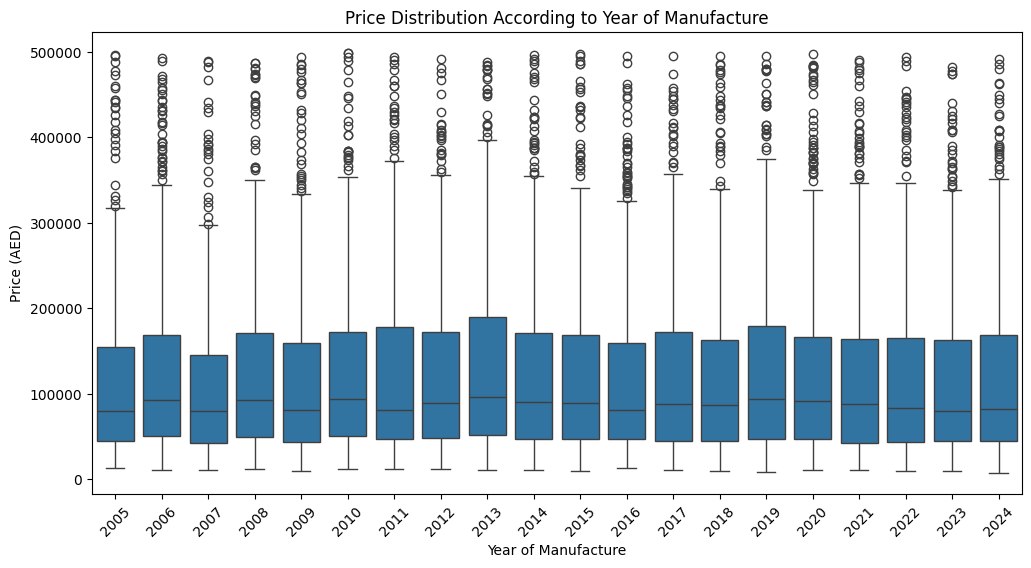

In [31]:
# Now I run the same graph but with the outliers removed
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Price', data=df_cleaned)
plt.title('Price Distribution According to Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (AED)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

# ⬆️Up here we can see the newly generated boxplot but with the outliers eliminated

# ⬇️For a more visual representation of the price of cars per year, I decide to design a column graph since it is much more visually readable.

/var/folders/5z/th_wpvgj5lq74h01w3066qgc0000gn/T/ipykernel_4670/690568172.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Price', data=df_cleaned, estimator='mean', ci=None)


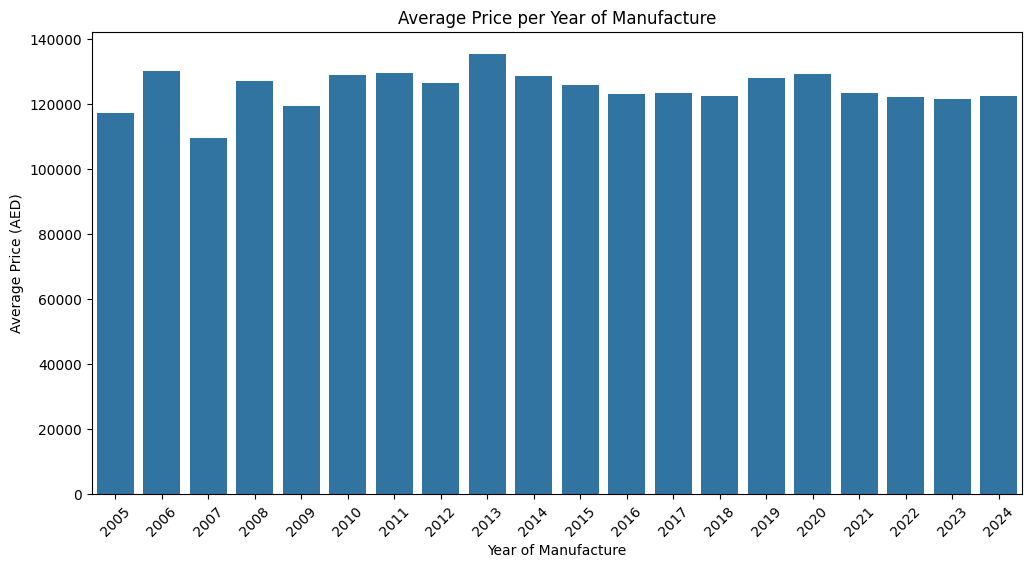

In [41]:
# Column chart for car price distribution by year
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Price', data=df_cleaned, estimator='mean', ci=None)
plt.title('Average Price per Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Price (AED)')
plt.xticks(rotation=45)
plt.show()

# ⬇️I also add an analysis of the Relationship between Mileage and Price (line graph)⬇️

/var/folders/5z/th_wpvgj5lq74h01w3066qgc0000gn/T/ipykernel_4670/47210915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Mileage_group'] = (df_cleaned['Mileage'] // 10000) * 10000


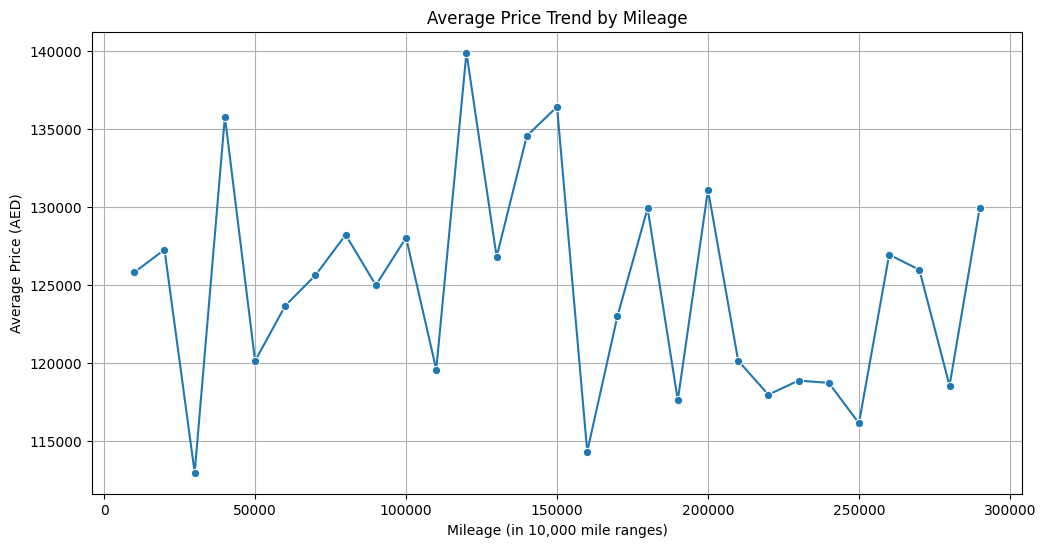

In [40]:
# Create a new column with mileage ranges (bins of 10,000)
df_cleaned['Mileage_group'] = (df_cleaned['Mileage'] // 10000) * 10000

# Group by these ranges and calculate the average price
mileage_price = df_cleaned.groupby('Mileage_group')['Price'].mean().reset_index()

# Graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='Mileage_group', y='Price', data=mileage_price, marker='o')
plt.title('Average Price Trend by Mileage')
plt.xlabel('Mileage (in 10,000 mile ranges)')
plt.ylabel('Average Price (AED)')
plt.grid(True)
plt.show()

# Here I did not find a clear correlation so I went deeper and realized that there are car brands whose price remains high and is preserved over time without the kilometers affecting it, so I decided to segment into brands such as BMW, Ford, Mercedes, Nissan and Toyota.

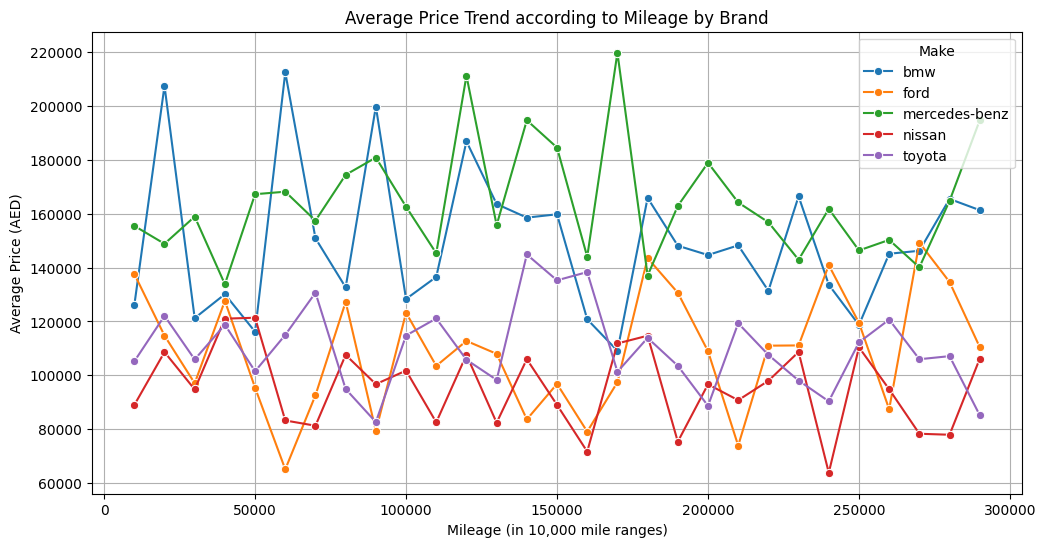

In [39]:
# Elegimos las marcas más comunes
top_marcas = df_cleaned['Make'].value_counts().nlargest(5).index

# Filtramos el DataFrame para esas marcas
df_top = df_cleaned[df_cleaned['Make'].isin(top_marcas)].copy()

# Agrupamos kilometraje por grupos de 10,000
df_top['Mileage_group'] = (df_top['Mileage'] // 10000) * 10000

# Calculamos el precio promedio por marca y grupo de kilometraje
grouped = df_top.groupby(['Make', 'Mileage_group'])['Price'].mean().reset_index()

# Gráfico de líneas con diferentes marcas
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='Mileage_group', y='Price', hue='Make', marker='o')
plt.title('Average Price Trend according to Mileage by Brand')
plt.xlabel('Mileage (in 10,000 mile ranges)')
plt.ylabel('Average Price (AED)')
plt.grid(True)
plt.show()

# ⬆️Up here you can see that there is a different trend between mileage and price, luxury brands are preserved much better

# ⬇️ The next exploration I do here will be by counting cars by transmission type to be able to know what type of transmission is more used in UAE

/var/folders/5z/th_wpvgj5lq74h01w3066qgc0000gn/T/ipykernel_4670/3439138210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transmission', data=df_cleaned, palette='Set2')


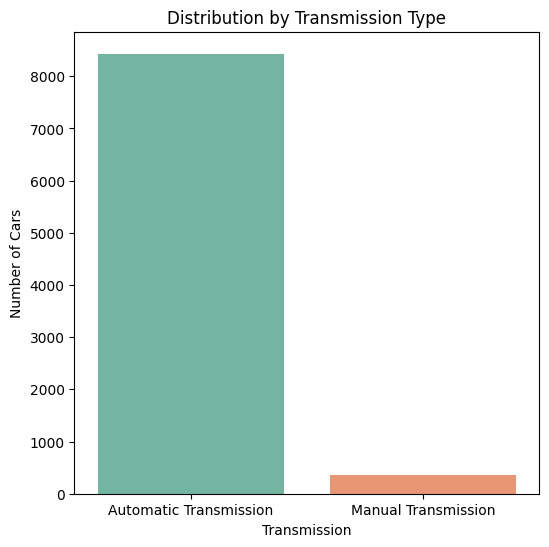

In [43]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Transmission', data=df_cleaned, palette='Set2')
plt.title('Distribution by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Number of Cars')
plt.show()

In [44]:
# As we can see, we have a clear winner for automatic driving.

# Top 10 cities with the most cars for sale🇦🇪

/var/folders/5z/th_wpvgj5lq74h01w3066qgc0000gn/T/ipykernel_4670/1540745200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='YlOrBr')


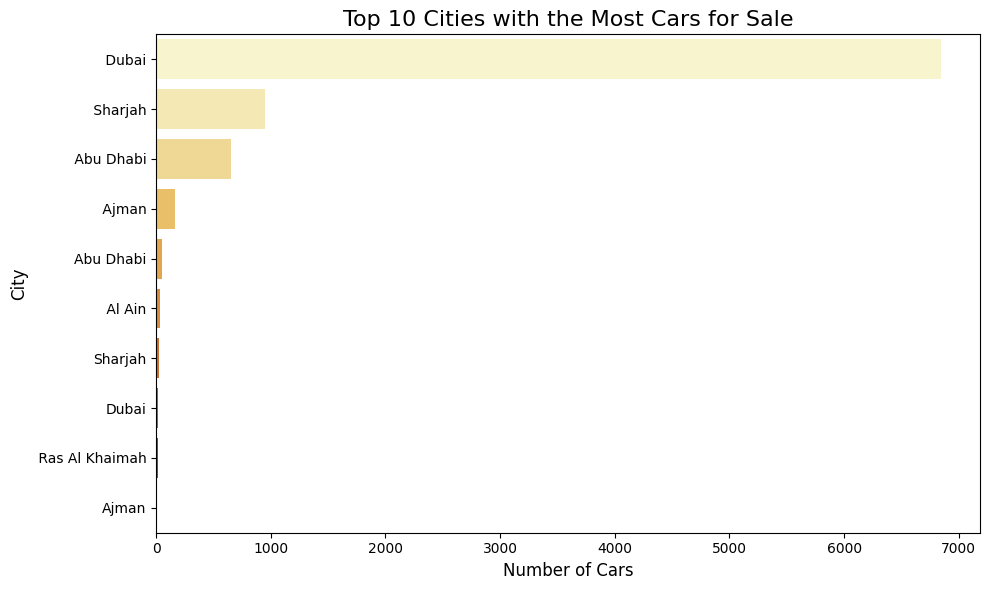

In [62]:
city_counts = df_cleaned['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='YlOrBr')
plt.title('Top 10 Cities with the Most Cars for Sale', fontsize=16)
plt.xlabel('Number of Cars', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Dubai is in the #top1 (it makes sense) 
# Another thing that can be seen is that there are 2 'Dubai' in the graph,
# this is due to an error in the consistency of the data,
# apparently they are the same but one is written with a space and this makes it different,
# I am going to proceed to fix this problem.

In [ ]:
# Clean the Location column: remove spaces and put it in title format
df_cleaned['Location'] = df_cleaned['Location'].str.strip().str.title()

/var/folders/5z/th_wpvgj5lq74h01w3066qgc0000gn/T/ipykernel_4670/2821744404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Location'] = df_cleaned['Location'].str.strip().str.title()


# Now I generate the same graph again(The problem is fixed)

/var/folders/5z/th_wpvgj5lq74h01w3066qgc0000gn/T/ipykernel_4670/1540745200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='YlOrBr')


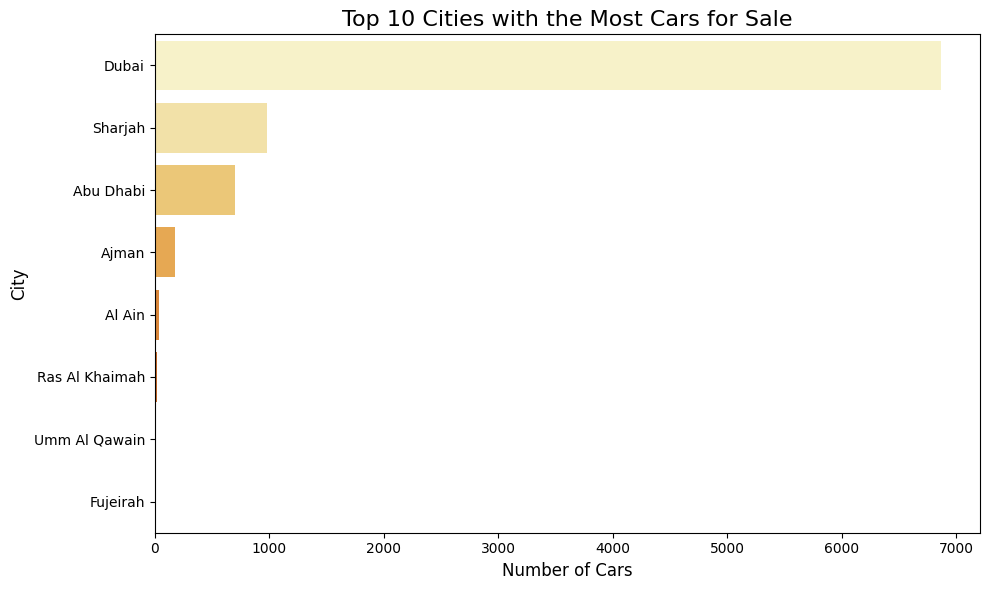

In [67]:
city_counts = df_cleaned['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='YlOrBr')
plt.title('Top 10 Cities with the Most Cars for Sale', fontsize=16)
plt.xlabel('Number of Cars', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Now I proceed to analyze trends in the colors of vehicles purchased🟩

In [ ]:
# Clear the Color column
df_cleaned['Color'] = df_cleaned['Color'].str.strip().str.title()

# Count the most common colors
color_counts = df_cleaned['Color'].value_counts()

/var/folders/5z/th_wpvgj5lq74h01w3066qgc0000gn/T/ipykernel_4670/942257326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Color'] = df_cleaned['Color'].str.strip().str.title()


/var/folders/5z/th_wpvgj5lq74h01w3066qgc0000gn/T/ipykernel_4670/3955898640.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_colors.values, y=top_colors.index, palette='cubehelix')


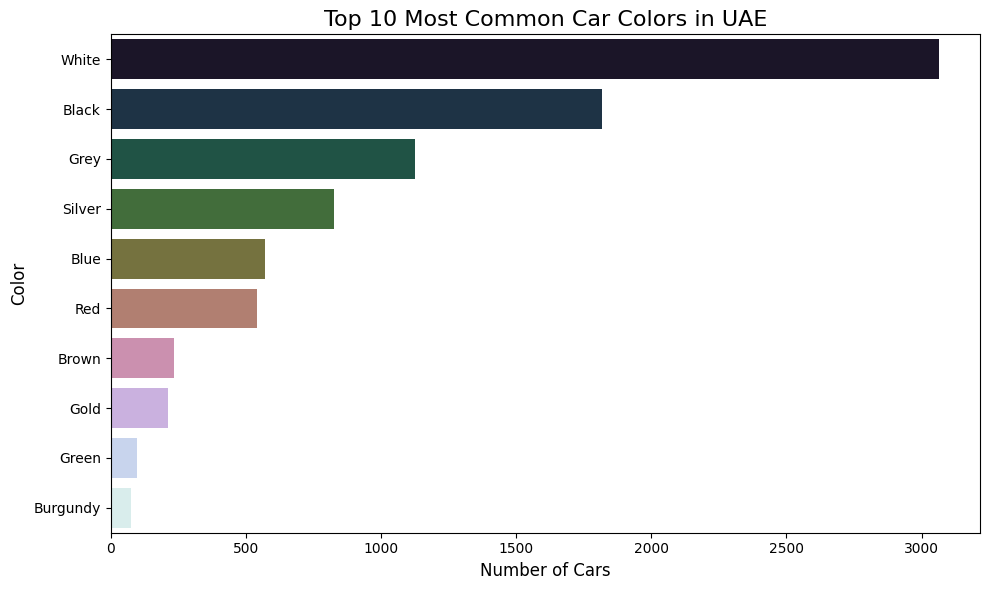

In [71]:
# Show the 10 most common colors
top_colors = color_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_colors.values, y=top_colors.index, palette='cubehelix')
plt.title('Top 10 Most Common Car Colors in UAE', fontsize=16)
plt.xlabel('Number of Cars', fontsize=12)
plt.ylabel('Color', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [73]:
# white and black are the most purchased colors, interesting...

# I proceed to create a graph that shows the 10 most expensive brands and the average price per brand

/var/folders/5z/th_wpvgj5lq74h01w3066qgc0000gn/T/ipykernel_4670/1568352594.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_make.values, y=avg_price_by_make.index, palette='coolwarm')


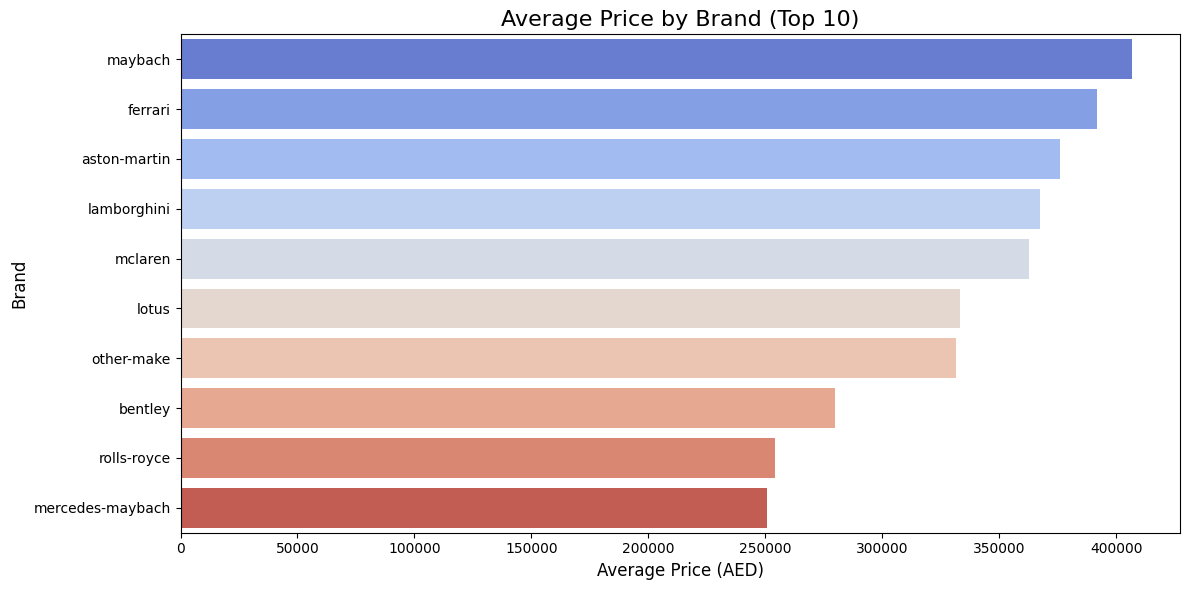

In [75]:
# Calculate the average price per brand and select the 10 most expensive
avg_price_by_make = df_cleaned.groupby('Make')['Price'].mean().sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_make.values, y=avg_price_by_make.index, palette='coolwarm')
plt.title('Average Price by Brand (Top 10)', fontsize=16)
plt.xlabel('Average Price (AED)', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.tight_layout()
plt.show()

# Above you can see that Maybach has the highest average most expensive price